# What's going on?

This is a *Jupyter notebook*. It is like a lab notebook that you can write and execute python code in. It lets you interactively break down the steps of computation and see intermediate results and visualizations. 


You can write python (or markdown) in these *cells*, and press `shift` + `enter` to run the code. Anything that you print will appear below the cell.  

Try printing "Hello HaC" in the cell below.


In [3]:
# Write Python in these cells!
print("Hello HaC!")


Hello HaC!


Before you execute a cell, it will say `In [ ]:` next to it:

<img src="img/before.png"></img>
<br>

When a cell is executing, it will say `In [*]:` next to it to indicate that it is still running:
<img src="img/load.png"></img>

<br>
When a cell has finished executing, it will say `In [n]:` to indicate that the cell has completed running, and that it was the `nth` cell to be evaluated:
<img src="img/after.png"></img>

That should be all you need to know to do this workshop -- but Jupyter has a lot of features -- check out <a href="http://jupyter.readthedocs.io/en/latest/"> the documentation for more information. </a>

In [4]:
# Let's import some packages
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>An introduction to Machine Learning with Scikit-Learn</h1>
    <br /><br />
    Parts of this notebook have been adapted from <a href="https://github.com/glouppe/tutorial-sklearn-lhcb/blob/master/An%20introduction%20to%20Machine%20Learning%20with%20Scikit-Learn.ipynb">this notebook created by Gilles Louppe,</a> core developer of Scikit-Learn.
    <br /><br />
</center>

## Prerequisites 

- Python 3 distribution with scientific packages (NumPy, SciPy, Scikit-Learn, Pandas)

- ... or Anaconda http://continuum.io/downloads

    

# Outline

* What is machine learning?
* Scikit-Learn
* Classifying hand written digits with KNN Classifier
* Model evaluation and selection
* Going further
* Summary


# Disclaimer 

This workshop will introduce you to some common software tools for Machine Learning, and explore a workflow of applying ML to data. It is by no means comprehensive and does not rigorously cover the theory behind the techniques, but it is the hope that this workshop will whet your appetite.


The reader is directed to these resources as a starting point for further learning.

* Machine Learning course taught by Andrew Ng (also avaiable on YouTube) https://www.coursera.org/learn/machine-learning (Andrew Ng, teching it is a massive figure in ML) there are a ton of outher courses on coursera, edx, and youtube.
(An alternative course would be this https://work.caltech.edu/telecourse.html) 
* <a href='http://kaggle.com'>Kaggle is a social network</a> for data science, it hosts competitions and data sets
* Machine Learning and Pattern Recognition textbook  http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf 

Software: 
* scikit learn, which we will be using in this notebook, easy to use, at the expense of control, off-the-shelf models (http://scikit-learn.org/stable/)
* TensorFlow, for efficient numerical calculations, primarily used for neural networks (https://www.tensorflow.org/)


# What is machine learning?

If you already have a high level, conceptual understanding of ML, feel free to skip this section!

Machine Learning aims to <strong> predict, understand or identify patterns in data </strong> from observations.

<img src="img/ml_diag.png"></img>

## Supervised Learning
<strong>Supervised learning</strong> - data comes with additional attributes that we want to predict

Supervised Learning is generally split into <strong> classification </strong> and <strong>regression</strong>.

### Classification

In <strong>classification</strong>, samples belong to two or more <strong>classes</strong> and we want to learn from already labeled data how to predict the class of unlabeled data.
<br>
For example, imagine we have a set of photos of dogs, and the corresponding breed for each dog.
<img src="img/class_doggos.png"></img>

<br>

Now, imagine you have a photo of a dog, but do not know what breed it is.
<img src="img/unseen_doggo.png"></img>
The goal of learning is then to train a model which, when presented with an unseen photo of a dog, can correctly label it as "Labrador Retreiver"
<br>
That is, we want to find a function $f$, such that:
<img src="img/doggo_equation.png"></img>

<img src="img/label_unseen.png"></img>




<br>
<br>

### Regression
In <strong>regression</strong>, you try to predict one or more continuous variables. 

<br>
For example, imagine we have a set of heights of dogs, and respective their weights.
<img src="img/regress.png"></img>
The goal of learning is to train a model which, given the height of a new dog, can correctly predict the dog's weight.
<img src="img/regress_unkown.png"></img>
<br>
<img src="img/dog_regress_eqn.png"></img>


## Unsupervised Learning
In <strong>unsupervised learning</strong>, data consists of a set of input vectors x without any corresponding target values. Unsupervised learning is <strong>not</strong> covered by this workshop, for more information <a href="https://en.wikipedia.org/wiki/Unsupervised_learning">look here.</a>

<br>
For example, imagine you have a set of photos of dogs, but you aren't trying to predict a corresponding label or attribute. Instead, you are concerned with the relationships between and structure of the data.

<img src="img/unsuper_dogs.png"></img>
<br>
<br>
Unspervised Learning can take the form of <strong>clustering</strong>, which aims to discover groups of similar examples within the data.

For example, given a set of dogs, try to group them into groups of similar dogs. 
<img src="img/cluster_dogs.png"></img>

Some other types of unsupervised learning are:
<ul>
<li><strong> Density Estimation </strong> to determine the distribution of data within the input space </li>
<li><strong> Dimensionality Reduction</strong> to project the data from a high-dimensional space down to a lower-dimensional space </li>
</ul>

<br>
<strong>Applications include:</strong> _Natural language processing, Computer vision, IR and advertisement, Robotics, Bioinformatics, High Energy Physics, ..._



# Scikit-Learn

We will be using Scikit-learn (sklearn) throughout this workshop. Here's a brief overview of what it is:
## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__

## Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Algorithms in SKLearn

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Ensemble methods (Random Forests, Bagging, GBRT, ...)
* Support Vector Machines
* Nearest neighbors
* Neural networks 

<center><a href="http://scikit-learn.org/dev/auto_examples/classification/plot_classifier_comparison.html"><img src="img/classifiers.png" width="90%" /></a>
<em>A comparison of (some of the) classifiers in Scikit-Learn</em></center><br />

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many more!_ (See the [Reference](http://scikit-learn.org/stable/modules/classes.html))

# A Practical Example: Classifying digits 

Let's work through an example of using a machine learning classifier to label images of handwritten digits. 

<strong>Note:</strong> If you do not have a linear algebra background, the term "dimensional" may sound intimidating. It shouldn't be -- here's some informal intuiton behind the concept:

We perceive 3 dimensions in our everyday lives, and we can visualise what 2D is, and what 3D is pretty easily.

<img src="img/2d3d.png"></img>

A point $p$ in 2D space can be represented by two coordinates, such as in the image above $\textbf{p}=[x,y]$.

A point $p$ in 3D space can br represented by three coordinates, such as in the image above $\textbf{p}=[x,y,z]$.

When one says $n$ dimensions, they are saying that you can describe a point (or direction) by a vector with $n$ elements. 


Now, let's get back to the digits.



## Input data

The <strong>digits dataset</strong> consists of 1797 images of handwritten digits. 

Each image of a digit, referred to as a sample, is represented by a 64 dimensional vector of integers $x \in \mathbb{Z}^{64}$. The elements of this vector are often refered to as the `features` of the sample.

Each image of a digit has a corresponding digit label, $t \in \{0,1,2,3,4,5,6,7,8,9\}$. This label is often refered to as the `class` or `target`.


We want to *classify* the images, i.e. predicting what digit is in the image.







In [6]:
# Import the dataset.
import sklearn.datasets
digits = sklearn.datasets.load_digits(n_class=10)
print("The dataset has {} sample digits, each represented as a {} dimensional feature vector.".format(digits.data.shape[0], digits.data.shape[1]))

The dataset has 1797 sample digits, each represented as a 64 dimensional feature vector.


Let's pick one of the samples from the dataset at random and have a look at it.

The cell below prints the feature vector of the randomly selected image. 

<strong>Note:</strong> Images on computers are stored as arrays of numbers. The value of each number tells the computer what color the 'pixel' of the image should be. In our case, each image of a digit has 64 'pixels'. The integer value of each element of the feature vector $x$ indicates how dark or light the corresponding pixel should be. 

In [11]:
from numpy.random import randint
# Pick a digit at random.  
j = randint(digits.data.shape[0])

# Print the feature vector of the randomly selected digit.
print("Feature vector of random image is x=", digits.data[j])

Feature vector of random image is x= [  0.   0.   1.  13.   0.   0.   0.   0.   0.   0.   7.  10.   0.   0.   0.
   0.   0.   1.  16.   2.   0.   0.   0.   0.   0.   4.  13.   0.   0.   0.
   0.   0.   0.   7.  12.   4.  11.   9.   1.   0.   0.   4.  16.  15.   8.
  12.   7.   0.   0.   2.  14.  10.   3.  13.   7.   0.   0.   0.   2.  13.
  16.   8.   1.   0.]


We can plot these values by reshaping the $64$ dimensional vector into an $8x8$ matrix. In this plot, the square at the position $n,m$ is white if the $n,m$th element of the matrix is equal to 0, and is increasingly darker as the value rises.

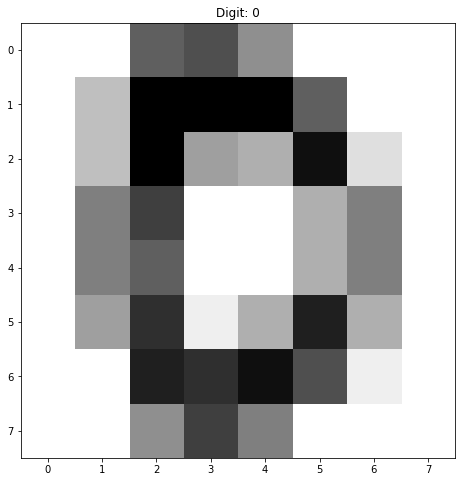

In [10]:
# Plot the data image, reshaping the 64 dimensional vector as an 8x8 matrix.
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("Digit: %d" % digits.target[j])

Looking good! Now that we know what our data actuall looks like, let's introduce more *jargon*.

In machine learning, you *train* your model by showing it known feature-target pairs of data, called the <strong>training set</strong>, and evaluate how well the model is able to predict targets given features on a *separate* dataset called the <strong>test set</strong>. This gives you an idea of how well the model would work in the real world.

Ideally, you only evaluate on the <strong>test set</strong> *after all tweaking and training* of your models has been completed. You want the performance on the test set to be an unbiased representation of how the model would perform on data in the real world. However, it is useful to have an intermediate idea of how well the model is doing, this is accomplished with a <strong>validation set</strong>.

In our example, we are going to split the digits dataset into three equal sets to create a <strong>training set</strong>, <strong>a validation set </strong> and <strong>a test set</strong>.

The digits in the <strong>training set</strong> will be used to train the model. The digits in the <strong>validation set</strong> will be used to evaluate how well our model is performing. When we are <strong>completely finished</strong> training we can test how well the model works by using it to classify the digits in the <strong>test set</strong>.



Let's randomly split our dataset into three.

In [ ]:
indeces = digits.data.shape[0]
# Shuffle the indeces of the digits dataset.
shuffled_indeces = permutation(indeces)

# Split the shuffled indeces into three equal parts.
training_indeces = shuffled_indeces[:indeces//3]
validation_indeces = shuffled_indeces[indeces//3:2*(indeces//3)]
test_indeces = shuffled_indeces[2*(indeces//3):]

# Select the digits indexed by training_indeces to be the training set
# Xtr contains the training features
Xtr = digits.data[training_indeces]
# ttr contains the corresponding targets (class label) for each
# digit in the training set
ttr = digits.target[training_indeces]

# Same for the validation set.
Xv = digits.data[validation_indeces]
tv = digits.target[validation_indeces]

# These will *only* be used for evaluation, when training is completed.
# Select the digits indexed by test_indeces to be the test set
# Xte contains the test features
Xte = digits.data[test_indeces]
# tte contains the corresponding test targets
tte = digits.target[test_indeces]

In [ ]:
print("There are {} digits in the training set".format(Xtr.shape[0]))
print("There are {} digits in the validation set".format(Xv.shape[0]))
print("There are {} digits in the test set".format(Xte.shape[0]))

## Data in Scikit-Learn

- Input data = Numpy arrays or sparse matrices ;
- Leverage efficient vector operations ;
- Keep code short and readable. 

## K-Nearest Neighbor 

To start, we will use the <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">$k$-nearest neighbors classifier</a> to classify our digits. 



The $k$-nearest neighbor classifier predicts the class of an unknown sample $x$ as the most common class among the $k$ 'nearest' points in the training set, where 'nearest' is defined by some distance metric, such as <a href='https://en.wikipedia.org/wiki/Euclidean_distance'>euclidean distance</a>.

e.g. 
The euclidean distance $d(*,*)$ between two points $a$ and $b$ where $a,b \in \mathbb{R^n}$
$$d(a, b)  = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2+\cdots+(a_i - b_i)^2+\cdots+(a_n - b_n)^2}$$


You distance can find all the <a href='http://scikit-learn.org/stable/modules/classes.html#pairwise-metrics'>distance metrics available in sklearn here</a>.


<img src="img/knn.png"></img>

In the diagram above, we have a training set consisting of all the yellow and purple circles. For each sample in our training set we have a feature vector $\textbf{x}= [x_1,x_2]$ and a corresponding label, $t \in \{A,B\}$.

Now, imagine we want to classify a new sample, the red star.  We know the feature vector of the red star $[x_1,x_2]$, but we do not know which class it is in. 

To classify the red star with the K Nearest Neighbors Classifier, we calculate what is the most commonly occuring class in the k closest neighboring samples. If $k=3$, then we predict that the red star is in class B. If $k=6$, then we predict the red star is in class A.




In [1]:
from sklearn.metrics.pairwise import euclidean_distances 
# Let's calculate the Euclidean distance between the 5th and 6th
# entries in the training set.
d = euclidean_distances(Xtr[5:7])
# d is a numpy array, where the (i,j)th entry indicates the distance 
# between the ith and jth samples.`
print("The pairwise euclidean distance between the 5th and 6th samples is:")
print(d)

NameError: name 'Xtr' is not defined

In [ ]:
# Can you calculate the manhattan distance between the 5th and 6th sample?
# hint -- check the distance metrics documentation link above.
manhattan_d = """evaluate the manhattan distance""" 
print("The pairwise manhattan distance between the 5th and 6th samples is:")
print(manhattan_d)

The default distance metric used in SKLearn implementation of the KNeighborsClassifier is the <a href="https://en.wikipedia.org/wiki/Minkowski_distance">minkowski distance</a>, a generalization of the euclidean and manhattan distances.

$d(A,B)=\left(\sum_{i=1}^n |a_i-b_i|^p\right)^{1/p}$

(When p=2, the default value for sklearn, this is the euclidean distance)

## A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- (a `transformer` interface for converting data.)

### Estimators

An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

In [ ]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``."""
        # compute predictions ``pred``
        return pred

In [ ]:
# Import the k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a K-nearest neighbor classifier, where the 2 nearest neighbors 
# are considered.
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model to the training data by calling the fit method of knn,
# and passing the training features Xtr and targets ttr.
knn."""CALL THE FIT METHOD"""

Congrats, you've just made your first machine learning model!

### Predictors
Now let's see how well it performs on the <strong>validation set</strong>.

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the classes, y, of the images in the validation set, Xv.
# by calling the predict method of knn.
y = knn."""CALL THE PREDICT METHOD"""

# Calculate the validation accuracy
# i.e. For what percent of the digits in Xv did our model 
# correctly predict the digit label tv
val_acc = accuracy_score(tv, y)
print("The KNN Classifier with k=2 has a validation accuracy of ", val_acc)

# Model evaluation and selection

# Cross Validation
Instead of splitting our dataset into 1/3 training and 1/3 validation, we can combine these sets to form one training set, and use <a href="http://scikit-learn.org/stable/modules/cross_validation.html">k-fold cross validation</a> to validate the performance of the model.

<center><img src="img/kfold.jpg" width="70%" /></center>

In KFold Cross validation, the training set is split into $k$ subsets.  $k-1$ subsets are used to train the model, and the remaining $1$ subset is used to evaluate its performance. 

This allows you to use a larger portion of the available data to train the model, while still validating its performance.

In [ ]:
from sklearn.cross_validation import KFold

# Let's recombine our training and validation set now that we are 
# using KFold Cross Validation.
Xtr = np.concatenate((Xtr, Xv), axis=0)
ttr = np.concatenate((ttr, tv), axis=0)
print(X.shape)


In [ ]:
scores = []
for train, valid in KFold(n=len(Xtr), n_folds=5, random_state=42):
    X_tr, t_tr = Xtr[train], ttr[train]
    X_v, y_v = Xtr[valid], ttr[valid]
    knn = KNeighborsClassifier().fit(X_tr, t_tr)
    scores.append(knn.score(X_v, y_v))

print("Mean Validation accuracy using K-folds cross validation %f +-%f:" % (np.mean(scores), np.std(scores)))

In [ ]:
# Shortcut
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(KNeighborsClassifier(), 
                         Xtr, ttr, cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="accuracy")
print("%f +-%f" % (np.mean(scores), np.std(scores)))

## Under- and over-fitting

- <strong>Under-fitting:</strong> the model is too simple and does not capture the true relation between X (the image vector) and t (the digit label).
- <strong>Over-fitting:</strong> the model is too specific to the training set and does not generalize to new, previously unseen images of digits.


Let's see how the model performs when fit with a range of different values of k.

When is it overfitting? When is it underfitting? 

In [ ]:
from sklearn.learning_curve import validation_curve

# Let's see how well the model performs for each value of k from 1 too 100
param_range = range(1, 100)
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(), Xtr, ttr, 
    param_name="n_neighbors", 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.xlabel("k (n_neighbors)")
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, train_scores_mean, color="red", label="training score")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.plot(param_range, valid_scores_mean, color="blue", label="validation score")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2, color="blue")
plt.legend(loc="best")

In [ ]:
# Best trade-off
print("max_depth = %d, accuracy = %f" % (param_range[np.argmax(valid_scores_mean)],
                                         np.max(valid_scores_mean)))

## Hyper-parameter search

- Learning algorithms are not black boxes, their execution is controlled by Hyper-parameters, such as the value of the number of neighbors, k, to consider. 
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- We can automatically fit and evaluate the classifier with each combination of a selection of hyperparameters with the `GridSearchCV` estimator.

You can see a complete list of the paramters of the Sklearn KNN Classifier implementation <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">in the documentation here</a>.

In [ ]:
from sklearn.grid_search import GridSearchCV

# Evaluate the performance of the classifier with each value of k from
# 1 to 100, using the manhattan and euclidean distance metrics, using
# different strategies for weighting the distances
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": ["""FILL THIS WITH RANGE OF K"""],
                                "metric": [ """FILL THIS IN WITH METRICS"""],
                                "weights" : ["""FILL THIS IN WITH WEIGHTS"""]
                                },
                    scoring="accuracy",
                    cv=5, n_jobs=-1)

grid."""FIT THE GRID BY CALLING THE FIT METHOD"""

print("Best score = %f, Best parameters = %s" % (grid.best_score_, 
                                                 grid.best_params_))

# Going further

Now that we've successfully fit the KNeighborsClassifier, let's try some others. Have a look at the <a href="http://scikit-learn.org/stable/supervised_learning.html#supervised-learning"> SKLearn Documentation to see what is available. </a>

Not sure what to try? Why not the <a href="http://scikit-learn.org/stable/modules/svm.html#multi-class-classification">Multi-class SVM implementation, `SVC` </a>


Try to do a `GridSearchCV` search, like we did with the KNeighborsClassifier, to select good hyperparameters for the model.

<strong> Note: If you want to add more cells here, go to Menu > Insert > Cell Below </strong>

## When you're all done
When you are done tinkering with different classifiers, test the accuracy of your classifier's predictions on the test set, Xte and tte.

Use the predict method of the classifier, and accuracy_score to compare the predictions to the actual labels in tte.

In [ ]:
# How does your classifier perform?



## Model persistence

As any Python objects, estimators can be saved to disk for future reuse using `pickle`. 

In [ ]:
knn_class = KNeighborsClassifier().fit(Xtr, ttr)

# Save to disk
import pickle
pickle.dump(knn_class, open("my-knn.dat", "wb"))

# Load from disk
pickle.load(open("my-knn.dat","rb"))

## Advanced topics

Scikit-Learn is more than training classifiers. It also covers:

- Clustering
- Matrix decomposition
- Kernel Density Estimation
- Outlier detection
- Out-of-core learning
- ...

## Further readings

### Software:
- Scikit-Learn <a href="http://scikit-learn.org/stable/documentation.html">documentation</a>, <a href="http://scikit-learn.org/stable/auto_examples/index.html">example gallery</a>
- PyCon 2015 tutorial: Parts <a href="https://www.youtube.com/watch?v=L7R4HUQ-eQ0">1</a> and <a href="https://www.youtube.com/watch?v=oGqGxvqA9-k">2</a>
- Complementary packages: <a href="http://statsmodels.sourceforge.net/">statsmodel</a>, <a href="http://dan.iel.fm/emcee/current/">emcee</a>, <a href="http://www.nltk.org/">NLTK</a>, <a href="http://deeplearning.net/software/theano/">Theano</a>, <a href="https://github.com/lisa-lab/pylearn2">Pylearn2</a>, <a href="https://github.com/JasperSnoek/spearmint">spearmint</a>, ...
- <a href="https://www.tensorflow.org/">TensorFlow</a> for highly efficient numerical operations, typically used for deep neural networks, on both GPUs and CPUs, on single machines and distributed over many devices<img src='img/tensorflow.png'></img>

### Datasets:
- <a href="https://archive.ics.uci.edu/ml/index.php">The UCI Machine Learning Repo has 417 datasets that are freely available for you to play with. </a>
- <a href='http://kaggle.com'>Kaggle is a social network</a> for data science, it hosts competitions and data sets

### Theory/Education:
- Machine Learning course taught by Andrew Ng (also avaiable on YouTube) https://www.coursera.org/learn/machine-learning (Andrew Ng, teching it is a massive figure in ML) there are a ton of outher courses on coursera, edx, and youtube.
- (An alternative course would be this https://work.caltech.edu/telecourse.html) 
- Machine Learning and Pattern Recognition textbook  http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf 


# Summary

- Scikit-Learn provides all essential tools for machine learning.
- It integrates within a larger Python scientific ecosystem.
- Try it for yourself!
